In [2]:
import os
import numpy as np
import sys
sys.path.append("../")
import settings
from datetime import datetime

from osgeo import gdal

### Define class to load tiff

In [3]:
class PERSIANN():
    def __init__(self, tif_file_path):
        self.tif_file_path = tif_file_path
        self.array = self._get_array_from_tif()
        self.date = datetime.strptime(os.path.basename(tif_file_path)[11:19], "%Y%m%d").date()
        
    def _get_array_from_tif(self):
        ds = gdal.Open(self.tif_file_path)
        band = ds.GetRasterBand(1)
        arr = band.ReadAsArray()
        return arr
class PDIR():
    def __init__(self, tif_file_path):
        self.tif_file_path = tif_file_path
        self.array = self._get_array_from_tif()
        self.date = datetime.strptime(os.path.basename(tif_file_path)[7:15], "%Y%m%d").date()
        
    def _get_array_from_tif(self):
        ds = gdal.Open(self.tif_file_path)
        band = ds.GetRasterBand(1)
        arr = band.ReadAsArray()
        return arr

### Declare vairable with tiff directory and example tiff path

In [4]:
# tif_data_directory = os.path.join(settings.final_data_path, "precipitation/precipitaciones_maldonado")
# tif_data_file = os.path.join(tif_data_directory, "PERSIANN_1d20161101.tif")
tif_data_directory = os.path.join(settings.final_data_path, "precipitation/precipitaciones_maldonado_PDIR-Now_daily")
tif_data_file = os.path.join(tif_data_directory, "PDIR_1d20150119.tif")

### Get and plot all precipitations in Laguna del Sauce

In [5]:
all_precipitation_files = [os.path.join(tif_data_directory, f) for f in os.listdir(tif_data_directory) if f.endswith(".tif")]

precipitation_data = []
for tif_file in all_precipitation_files:
    #precipitation_data.append(PERSIANN(tif_file))
    precipitation_data.append(PDIR(tif_file))

In [6]:
precipitation_data[0].array

array([[-99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99,
        -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99,
        -99],
       [-99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99,
        -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99,   0, -99,
        -99],
       [-99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99,
        -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99,   1, -99,
        -99],
       [-99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99,
        -99, -99, -99, -99, -99, -99, -99, -99, -99, -99,   0,   0, -99,
        -99],
       [-99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99,
        -99, -99, -99, -99, -99, -99, -99,   1,   1,   1,   0,   0, -99,
        -99],
       [-99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99, -99,
        -99, -99, -99, -99, -99, -99,   2,   1,   1,   2,   1,   1, -99,
        -99],
       [-99, -99, -99, -99, -99, -99, -9

In [7]:
precipitation_data[0].array.shape

(28, 27)

In [39]:
import pandas as pd

def get_average_precipitation(precipitation_array):
    valid_measures = []
    h, w = precipitation_array.shape
    for i in range(h):
        for j in range(w):
            pixel_precipitation = precipitation_array[i, j]
            if pixel_precipitation != -99:
                valid_measures.append(pixel_precipitation)
    return sum(valid_measures)/len(valid_measures)

output = []
for p in precipitation_data:
    #precipitation = p.array[-1,1]
    #if precipitation > 200: continue
    precipitation = get_average_precipitation(p.array)
    output.append({"precipitation": precipitation, "date":p.date})
    
precipitation_df = pd.DataFrame(output).sort_values(by="date")

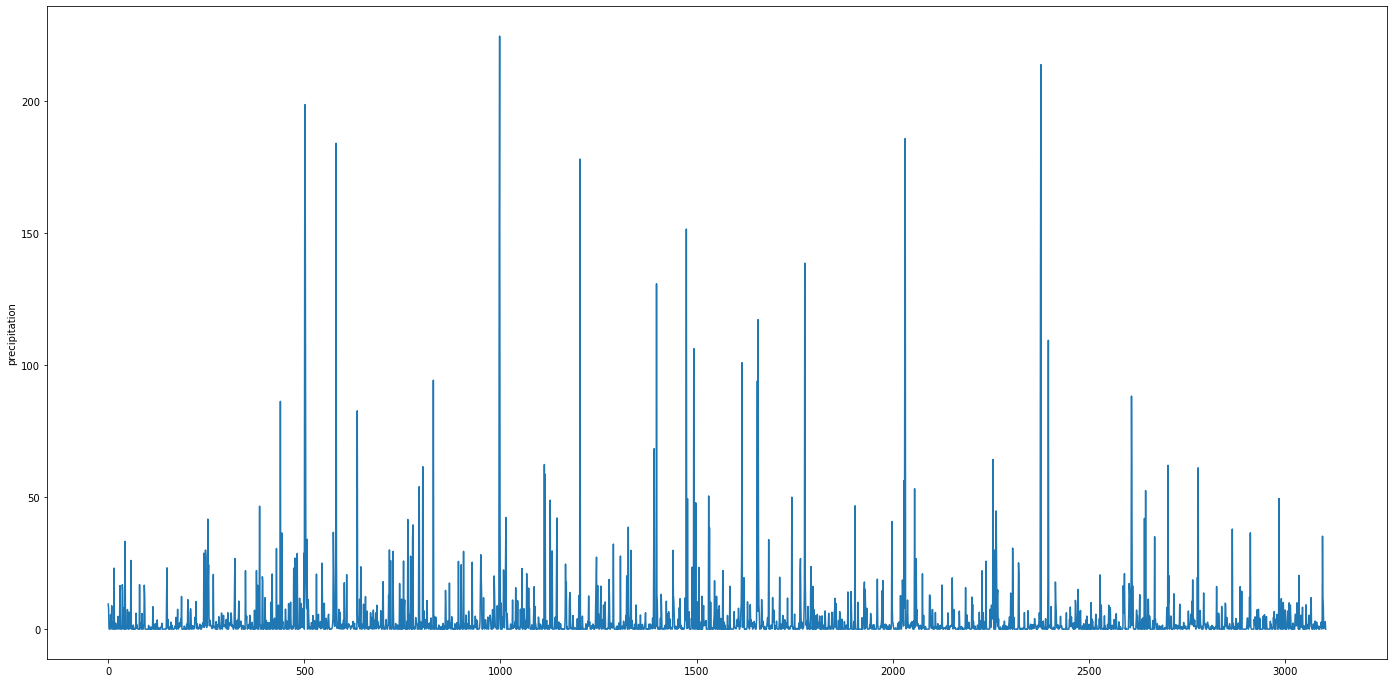

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 12))
plt.plot(precipitation_df["precipitation"].values)
plt.ylabel('precipitation')
plt.show()

### Save precipitation and date in CSV

In [41]:
precipitation_save_path = os.path.join(settings.final_data_path, "precipitation", "precipitation_pdir.csv")
precipitation_df.to_csv(precipitation_save_path, index=False)